<a href="https://colab.research.google.com/github/dharshini1199html/Heart-Disease-Prediction/blob/main/speech_emotion_rec_Crt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import librosa
import librosa.display
from IPython.display import Audio
import matplotlib.pyplot as plt
import soundfile as sf
import numpy as np

In [ ]:
x, sr = librosa.load('/content/drive/MyDrive/SPEECH Data set/Actor_01/03-01-01-01-01-02-01.wav')
sf.write('stereo_file.wav', np.random.randn(10, 2), 44100, 'PCM_24')
Audio(data=x, rate=sr)

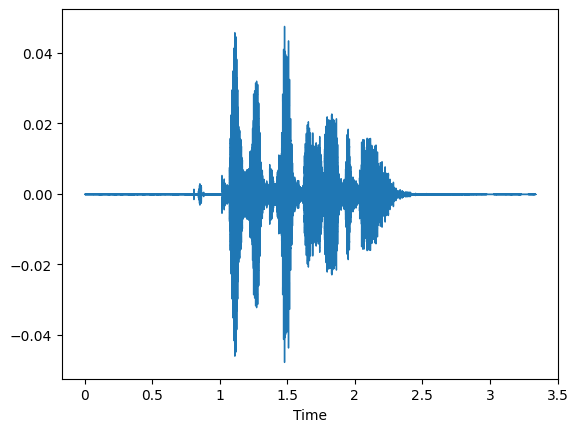

In [ ]:
librosa.display.waveshow(x,sr=sr)

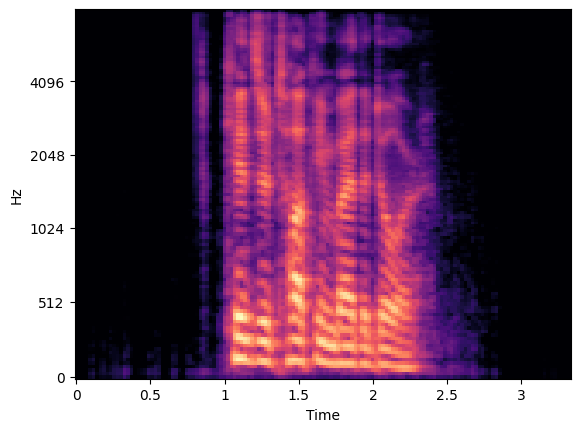

In [ ]:
spectrogram=librosa.feature.melspectrogram(y=x,sr=sr,n_mels=128,fmax=8000)
spectrogram = librosa.power_to_db(spectrogram)
librosa.display.specshow(spectrogram, y_axis='mel', fmax=8000, x_axis='time');

In [ ]:
# Data Preprocessing 
# Silence Removal
# Taking window of 4 and if number of zero croasigs are greater than 2,we dont include amplitudes in this wondow
def zero_crossing(x):
    zero_crossings=[]
    silence_removed=[]
    silence_removed=np.array(silence_removed)
    for i  in range(1,len(x)):
        # detecting zero crossing
        if(x[i-1]<=0 and x[i]>0):
            zero_crossings.append(1)
        else:
            zero_crossings.append(0)
    for i in range(len(zero_crossings)-3):
        zeros=np.sum(zero_crossings[4*i:4*(i+1)])
        #print(zeros)
        zeros=4-zeros
        if(zeros>2):
            silence_removed=np.concatenate((silence_removed,np.array(x[4*i:4*(i+1)])))
    print("Before Silence Removal : ",len(x),"\nAfter Silence Removal : ",len(silence_removed))
    return silence_removed

In [ ]:
silence_removed=zero_crossing(x)

Before Silence Removal :  73574 
After Silence Removal :  63786


In [ ]:
Audio(data=x, rate=sr)

In [ ]:
Audio(data=silence_removed, rate=sr)

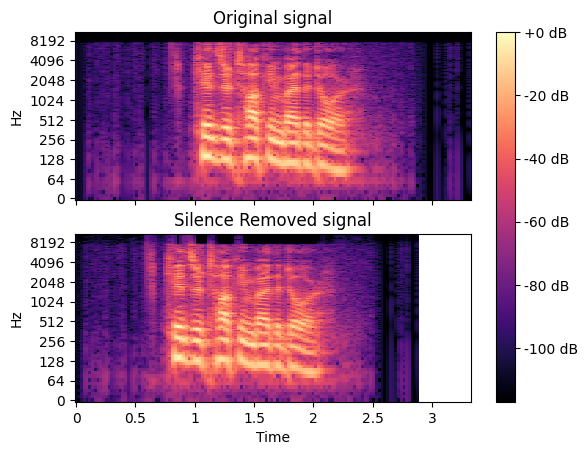

In [ ]:
S_orig = librosa.amplitude_to_db(np.abs(librosa.stft(x)), ref=np.max, top_db=None)
S_preemph = librosa.amplitude_to_db(np.abs(librosa.stft(silence_removed)), ref=np.max, top_db=None)
fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True)
librosa.display.specshow(S_orig, y_axis='log', x_axis='time', ax=ax[0])
ax[0].set(title='Original signal')
ax[0].label_outer()
img = librosa.display.specshow(S_preemph, y_axis='log', x_axis='time', ax=ax[1])
ax[1].set(title='Silence Removed signal')
fig.colorbar(img, ax=ax, format="%+2.f dB")

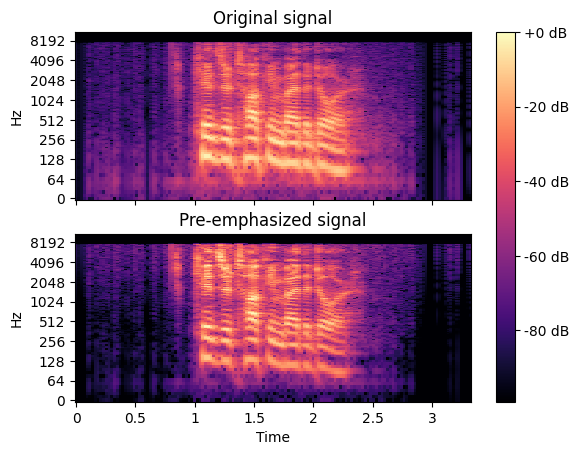

In [ ]:
#Pre-emphasis
y_filt = librosa.effects.preemphasis(x)
# and plot the results for comparison
S_orig = librosa.amplitude_to_db(np.abs(librosa.stft(x)), ref=np.max, top_db=None)
S_preemph = librosa.amplitude_to_db(np.abs(librosa.stft(y_filt)), ref=np.max, top_db=None)
fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True)
librosa.display.specshow(S_orig, y_axis='log', x_axis='time', ax=ax[0])
ax[0].set(title='Original signal')
ax[0].label_outer()
img = librosa.display.specshow(S_preemph, y_axis='log', x_axis='time', ax=ax[1])
ax[1].set(title='Pre-emphasized signal')
fig.colorbar(img, ax=ax, format="%+2.f dB")

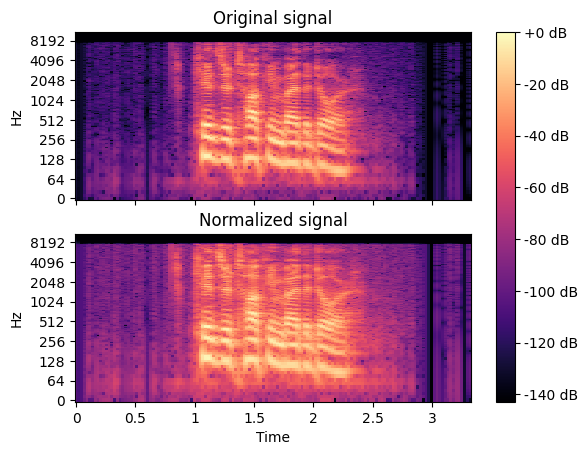

In [ ]:
#Normalization
x_norm=x/max(x)
S_orig = librosa.amplitude_to_db(np.abs(librosa.stft(x)), ref=np.max, top_db=None)
S_preemph = librosa.amplitude_to_db(np.abs(librosa.stft(x_norm)), ref=np.max, top_db=None)
fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True)
librosa.display.specshow(S_orig, y_axis='log', x_axis='time', ax=ax[0])
ax[0].set(title='Original signal')
ax[0].label_outer()
img = librosa.display.specshow(S_preemph, y_axis='log', x_axis='time', ax=ax[1])
ax[1].set(title='Normalized signal')
fig.colorbar(img, ax=ax, format="%+2.f dB")

In [ ]:
def preprocessing(file):
    X,sample_rate = librosa.load(file)
    # zero crossing
    #silence_removed=zero_crossing(X)
    # Pre emphasis
    y_filt = librosa.effects.preemphasis(X)
    # normalization
    #x_norm=y_filt/max(y_filt)
    return y_filt,sample_rate

In [ ]:
# All the types of emotions that are present
emotions_all={
    '01' : 'neutral', 
    '02' : 'calm' ,
    '03' : 'happy' ,
    '04' : 'sad' ,
    '05' : 'angry', 
    '06' : 'fearful' ,
    '07' : 'disgust', 
    '08' : 'surprised'
}

In [ ]:
# Feature extraction using librosa a python package for audio analysis 
# Chroma features

def feature_extraction(X,sample_rate):
    result = np.array([])

    # chroma stft: Compute a chromagram from a waveform or power spectrum
    stft = np.abs(librosa.stft(X))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft))
    
    # mfcc: Mel-frequency cepstral coefficients
    mfcc = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mfcc))
    
    # melspectogram: Compute a mel-scaled spectrogram
    mel = np.mean(librosa.feature.melspectrogram(y=X, sr=sample_rate).T, axis=0)
    result=np.hstack((result, mel))
    
    return result

In [ ]:
from glob import glob
files_audio = glob('/content/drive/MyDrive/SPEECH Data set'+'/*/*.wav')

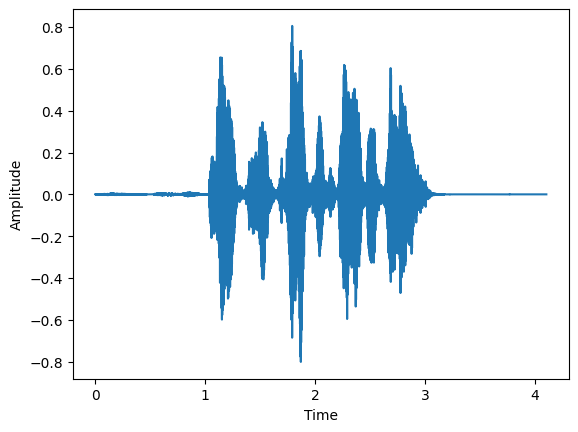

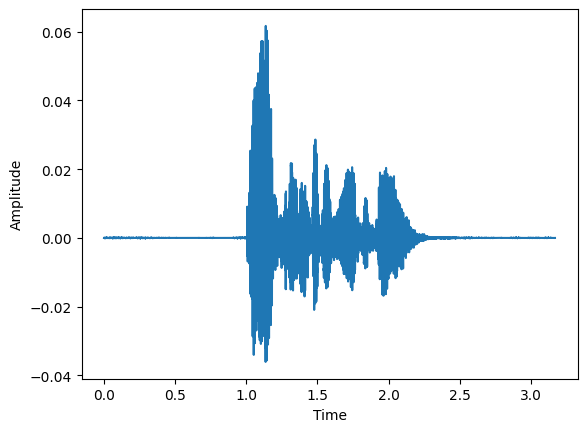

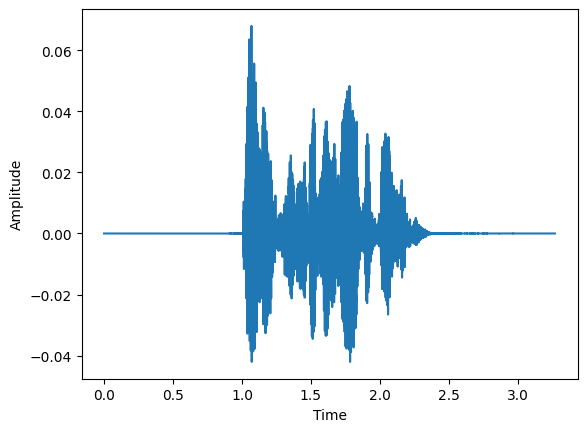

In [ ]:
import matplotlib.pyplot as plt

for i in range(3):
    audio,sfreq = librosa.load(files_audio[i])
    time = np.arange(0,len(audio))/sfreq
    fig,ax = plt.subplots()
    ax.plot(time,audio)
    ax.set_xlabel('Time')
    ax.set_ylabel('Amplitude')

In [ ]:
# Read File name identifiers and load data values

x,y=[],[]
# Considered the following emotions
emotions=['happy','sad','angry','fearful','disgust']

from IPython.display import clear_output
e = set()

for file in files_audio:
        clear_output(wait=True)
        file_name = file.split('/')[-1]
        emotion=emotions_all[file_name.split("-")[2]]
        if emotion not in emotions:
            continue
        e.add(file.split('/')[-2])
        # preprocessing audio data
        pre_speech=preprocessing(file)
        # feature extraction from audio
        feature=feature_extraction(pre_speech[0],pre_speech[1])
        print(e)
        x.append(feature)
        y.append(emotion)

{'Actor_15', 'Actor_17', 'Actor_16', 'Actor_14', 'Actor_13', 'Actor_19', 'Actor_05', 'Actor_12', 'Actor_01', 'Actor_04', 'Actor_06', 'Actor_11', 'Actor_07', 'Actor_18', 'Actor_21', 'Actor_08', 'Actor_09', 'Actor_02', 'Actor_03', 'Actor_10', 'Actor_20'}


In [ ]:
# features of audio
x = np.array(x)

<BarContainer object of 5 artists>

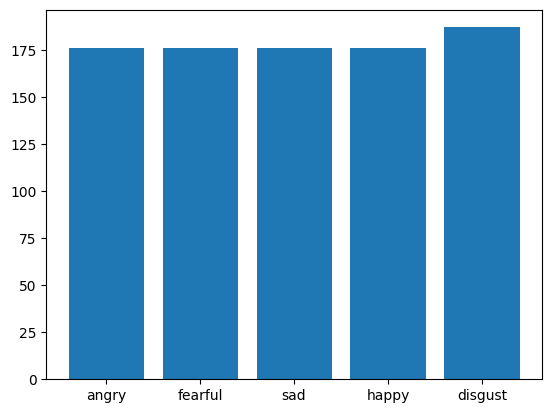

In [ ]:
from collections import Counter
target_count=pd.Series(Counter(y))
plt.bar(target_count.index,target_count)

In [ ]:
x.shape

(891, 160)

In [ ]:
len(y)

891

In [ ]:
# Encoding technique to handle categorical variables (Emotions)
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [ ]:
# Transform features by scaling each feature to given range
from sklearn.preprocessing import MinMaxScaler
scaler  =  MinMaxScaler()
x = scaler.fit_transform(x)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=4,shuffle=True,stratify=y)

In [ ]:
# XGBClassifier: Boosting algorithm based on gradient boosted decision trees algorithm
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
model=XGBClassifier()
#Training
model.fit(x_train,y_train)
#Prediction
y_pred1=model.predict(x_test)
print(accuracy_score(y_test,y_pred1))

0.6536312849162011


In [ ]:
# LGBMClassifier: Light gradient boosting
import lightgbm as lgb
#from lightgbm import LightGBMClassifier
model = lgb.LGBMClassifier(learning_rate=0.09,max_depth=-5,random_state=42)
model.fit(x_train,y_train,eval_set=[(x_test,y_test),(x_train,y_train)],
          verbose=20,eval_metric='logloss')

/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[20]	training's multi_logloss: 0.294098	valid_0's multi_logloss: 0.995647
[40]	training's multi_logloss: 0.0601792	valid_0's multi_logloss: 0.8944
[60]	training's multi_logloss: 0.0127871	valid_0's multi_logloss: 0.856856
[80]	training's multi_logloss: 0.00266577	valid_0's multi_logloss: 0.889519
[100]	training's multi_logloss: 0.000564214	valid_0's multi_logloss: 0.942611


LGBMClassifier(learning_rate=0.09, max_depth=-5, random_state=42)

In [ ]:
y_pred2=model.predict(x_test)
print(accuracy_score(y_test,y_pred2))

0.7039106145251397


In [ ]:
# RandomForestClassifier: Ensemble learning method for classification
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=3, random_state=0)
clf.fit(x_train,y_train)
y_pred3=clf.predict(x_test)
print(accuracy_score(y_test,y_pred3))

0.45251396648044695


In [ ]:
# MLPClassifier: Multi layer perceptron classifier
from sklearn.neural_network import MLPClassifier
model=MLPClassifier(alpha=0.01, batch_size=256, epsilon=1e-08, hidden_layer_sizes=(300,100), learning_rate='adaptive', max_iter=1000)
model.fit(x_train,y_train)
y_pred4=model.predict(x_test)
print(accuracy_score(y_test,y_pred4))

0.6480446927374302


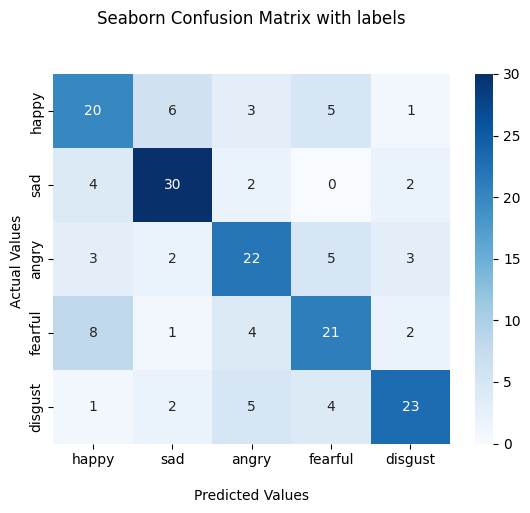

In [ ]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test,y_pred4, labels=[0,1,2,3,4])
import seaborn as sns

ax = sns.heatmap(matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['happy','sad','angry','fearful','disgust'])
ax.yaxis.set_ticklabels(['happy','sad','angry','fearful','disgust'])

## Display the visualization of the Confusion Matrix.
plt.show()

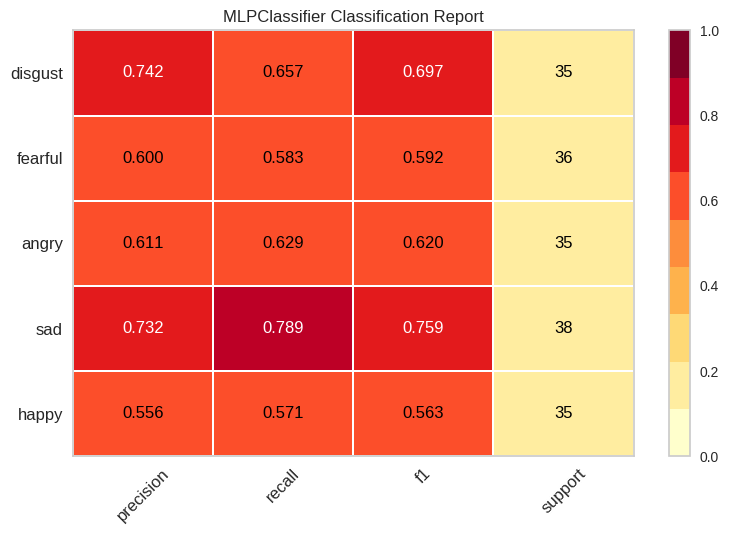

<Axes: title={'center': 'MLPClassifier Classification Report'}>

In [ ]:
from yellowbrick.classifier import ClassificationReport
visualizer = ClassificationReport(model, classes=['happy','sad','angry','fearful','disgust'], support=True)

visualizer.fit(x_train, y_train)        # Fit the visualizer and the model
visualizer.score(x_test, y_test)        # Evaluate the model on the test data
visualizer.show() 

In [ ]:
emotions_all={
    '01' : 'neutral', 
    '02' : 'calm' ,
    '03' : 'happy' ,
    '04' : 'sad' ,
    '05' : 'angry', 
    '06' : 'fearful' ,
    '07' : 'disgust', 
    '08' : 'surprised'
}

In [ ]:
test_audio, sr = librosa.load('/content/drive/MyDrive/SPEECH Data set/Actor_04/03-01-04-01-02-02-04.wav')
Audio(data=test_audio, rate=sr)

In [ ]:
emotion=emotions_all['03-01-04-01-02-02-04'.split("-")[2]]

In [ ]:
x=[]
y=[]
pre_speech=preprocessing('/content/drive/MyDrive/SPEECH Data set/Actor_04/03-01-04-01-02-02-04.wav')
feature=feature_extraction(pre_speech[0],pre_speech[1])
x.append(feature)
y.append(emotion)

In [ ]:
pred=model.predict(x)

In [ ]:
# Predicted Emotion
label_encoder.inverse_transform(pred)

array(['sad'], dtype='<U7')